In [47]:
import pandas as pd
import wordcloud
import matplotlib.pyplot as plt
import jieba
from collections import Counter
from wordcloud import WordCloud
from snownlp import SnowNLP
import numpy as np
from scipy.stats import ttest_ind


plt.rcParams["figure.figsize"] = (10,4)

seed = 1016

# Load and Manipulate Data

In [2]:
#Load data
col_names = ['Title', 'User', 'Time', 'Model', 'Satisfied', 'Unsatisfied']
nev_review_raw = pd.read_csv('/Users/_smile_cool/Desktop/BA Project/Research Project/Data/NEV_review_edited.csv', names = col_names, skiprows = [0, 1])
icev_review1_raw = pd.read_csv('/Users/_smile_cool/Desktop/BA Project/Research Project/Data/ICEV_review1_edited.csv', names = col_names, skiprows = [0, 1])
icev_review2_raw = pd.read_csv('/Users/_smile_cool/Desktop/BA Project/Research Project/Data/ICEV_review2_edited.csv', names = col_names, skiprows = [0, 1])

In [3]:
nev_review_raw.shape

(15387, 6)

In [4]:
nev_review_raw.head()

,Title,User,Time,Model,Satisfied,Unsatisfied
0,ModelY长续三个月深度体会（真实感受仅为分享不喜勿喷！）,美妮妮,2021-12-09 发表口碑,Model Y,1.内饰：可能是之前在欧洲工作，喜欢简洁（木纹金属翻皮，但不简陋）的内饰。家里另一辆车是保时...,1.空调逻辑：开到现在也没研究出就“出风“的模式，有时我只要出风（不用冷热），必须调到恰当的...
1,加速快，车机流畅，轮毂漂亮，红色相当满意。,想想小宝,2021-12-05 发表口碑,Model Y,1.红色车漆：最满意的地方就是选了红色车漆，临近交车前，看到了满大街全是黑色的Y，开了30分...,车顶有时候会有吱吱吱声，另外减配了中央扶手箱的usb数据功能。还有就是，胎压太大了，3.1的...
2,满载快乐出行,成都车友5264367,2022-08-18 发表口碑,Model Y,空间大、辅助驾驶给力。平常就喜欢带些毛毛狗狗出行，超大后备箱且汪汪也可以透过后排座椅吹空调他...,后备箱没有出风口、座椅“腿”太廉价、天窗太晒。虽然汪汪可以吹空调但只限于头，体验不佳感觉它们...
3,与小Y半年的小小心得,叶叶叶叶Yy,2022-08-18 发表口碑,Model Y,1.车辆的续航是最满意的一点，续航显示非常的精准，官方标准续航在545公里，目前成都天气炎热...,1.大天窗，不带遮阳帘，是我最喜欢，也是最不满意一点，成都夏天温度均在38-40左右，如果停...
4,喜欢其实很简单,随便起一个名儿,2022-08-19 发表口碑,Model Y,1.最满意的还是这个独一无二的外观，非常的独特有个性，别具一格2.内饰简约设计方式，打破传统...,特斯拉给我的感觉就是科技感爆棚，科技满满，但竟然不支持手机投屏，不支持carplay，不支持...


In [5]:
#Concat ICEV data
icev_review_raw = pd.concat([icev_review1_raw, icev_review2_raw], axis = 0, ignore_index = True)
icev_review_raw.shape

(21888, 6)

In [6]:
icev_review_raw.head()

,Title,User,Time,Model,Satisfied,Unsatisfied
0,日产轩逸，很值得入手。,入戏太深q9,2022-08-16 发表口碑,轩逸,日产轩逸整体的设计是很漂亮的，因为白色的车身显得更加的时尚，更加的干净了一些，珍珠白在太阳下...,最不满意的是日产轩逸这款车的空间不是特别大，整体的使用空间不是很宽敞，头部和腿部的空间表现有...
1,油耗低、颜值高、价格便宜，轩逸每一点都GET到我的点了。,衰仔车神,2022-08-14 发表口碑,轩逸,看了这么多的车，轩逸从综合性能上来讲，是我看的几款车里面比较均衡的了，特别就是比较适合我们这...,说实在的，买新车本身就是一件比较喜庆的事情，现在车开着也非常的顺畅，要说非常不满意的地方确实...
2,轩逸的简单，就是让人放心，很好用,珠海车友4437777,2022-08-14 发表口碑,轩逸,这点确实还是挺多的，其实整个车子看起来我对他最满意的地方，首先第一天就是一个设计方面吧，我觉...,并没有什么特别不满意的地方，因为整个车子其实看的也比较久，我觉得整个车子坐的都还行，除了这个...
3,喜欢轩逸这个高性价比,AILIXI,2022-08-12 发表口碑,轩逸,作为普普通通的上班一族，家用代步选择了轩逸，最满意的就是它的实用性了，首先从油耗上来讲，轩逸...,轩逸版算是性价比最高的版本了，不过缺点就是配置横向对比其他车还是有点低了的，比如电动座椅、巡...
4,喜欢的也确实挺让人满意,壹茳4dq,2022-08-09 发表口碑,轩逸,我对于这个车子最满意的地方，其实整体就是觉得性价比还是挺合适的吧，包括他的风格设计，还有他的...,其实也并没有什么让我特别不满意的地方，因为整体来说的话，我觉得用起来还是比较放心的，毕竟整体...


In [7]:
#Resample data
nev_review = nev_review_raw.sample(15000, random_state = seed)
icev_review = icev_review_raw.sample(15000, random_state = seed)
print(nev_review.shape)
print(icev_review.shape)

(15000, 6)
(15000, 6)


In [8]:
jieba.load_userdict('/Users/_smile_cool/Desktop/BA Project/Research Project/汽车词汇大全.text')

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/tm/59nk8bf17r17_kt5f_2msxmh0000gn/T/jieba.cache
Loading model cost 0.690 seconds.
Prefix dict has been built successfully.


In [9]:
part1 = nev_review['Satisfied']
part2 = nev_review['Unsatisfied']
part1.columns = ['All_Reviews']
part2.columns = ['All_Reviews']

nev_review_stacked = pd.concat([part1, part2], ignore_index=True)


In [10]:
nev_review_stacked = pd.DataFrame(nev_review_stacked)

In [11]:
nev_review_stacked.columns = ['Reviews']

# Load Stopwords and Define Wordclouud Function

In [12]:
with open('/Users/_smile_cool/Desktop/BA Project/Research Project/stop-word-master/中文停用词，标点符号-已分词.txt','r',encoding='utf-8') as f:
    stop_word = f.read()

In [13]:
stop_word += '\n新能源\n车\n满意\n喜欢\n比亚迪\n唐\n汉\n宋\n秦\n车子\n这款\n地方\n真的\n买\n感受\n挺\n用车\n这辆\n凯美瑞\n朗逸\n不太\n稍微\n新车\n感觉\n跑\n确实\n选择\n平时\n买车\n很大\n这车\n台车\n不用\n要说\n没什么\n有时候\n轩逸\nH6\n够用\n足够\n功能\n缺点'

In [14]:
stop_word_list = stop_word.split('\n')

# Generate Word Frequencies and Wordclouds

## Define Functions

In [15]:
cat_nev_sat = nev_review.Satisfied.str.cat(sep=' ')
cat_nev_unsat = nev_review.Unsatisfied.str.cat(sep=' ')
cat_icev_sat = icev_review.Satisfied.str.cat(sep=' ')
cat_icev_unsat = icev_review.Unsatisfied.str.cat(sep=' ')

In [49]:
def get_20_most_common_and_frequencies(text, stop_word):
    words = []
    read = jieba.cut(text)
    for i in list(read):
        if i not in stop_word:
            words.append(i)
    return dict(Counter(words).most_common(20))

def get_50_most_common_words(text, stop_word):
    words = []
    read = jieba.cut(text)
    for i in list(read):
        if i not in stop_word:
            words.append(i)
    return list(dict(Counter(words).most_common(50)).keys())

def wc_from_word_count(word_count):
    '''根据词频字典生成词云图'''
    wc = WordCloud(
        font_path = '/System/Library/Fonts/STHeiti Light.ttc',
        max_words=500,  # 最多显示词数
        # max_font_size=100,  # 字体最大值
        background_color="white",  # 设置背景为白色，默认为黑色
        width = 1500,  # 设置图片的宽度
        height= 960,  # 设置图片的高度
        margin= 10  # 设置图片的边缘
    )
    wc.generate_from_frequencies(word_count)  # 从字典生成词云
    plt.imshow(wc)  # 显示词云
    plt.axis('off')  # 关闭坐标轴
    plt.show()  # 显示图像
    
def plot_freqency(count_dict):
    fig, ax = plt.subplots(figsize=(10,4), dpi=100)
    columns = []
    vals = []
    for k, v in count_dict.items():
        columns.append(k)
        vals.append(v)
        
    bar = plt.bar(columns, vals)
    plt.bar_label(bar)
    plt.show()

## Satisfied for NEVs

In [17]:
nev_sat_20 = get_20_most_common_and_frequencies(cat_nev_sat, stop_word)

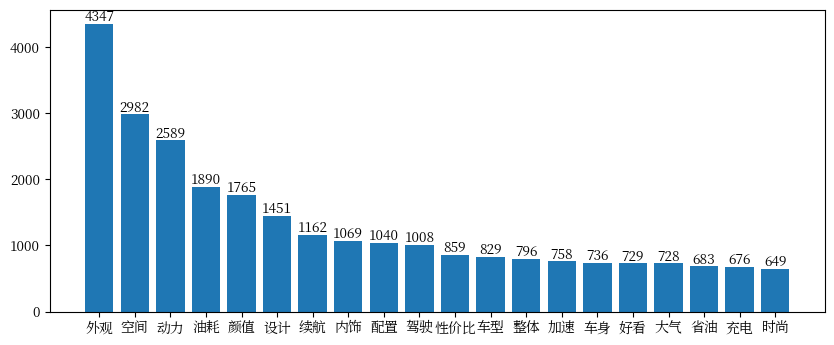

In [50]:
plot_freqency(nev_sat_20)

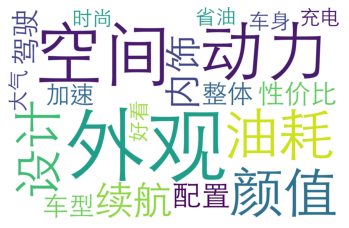

In [19]:
wc_from_word_count(nev_sat_20)

## Satisfied for ICEVs

In [20]:
icev_sat_20 = get_20_most_common_and_frequencies(cat_icev_sat, stop_word)

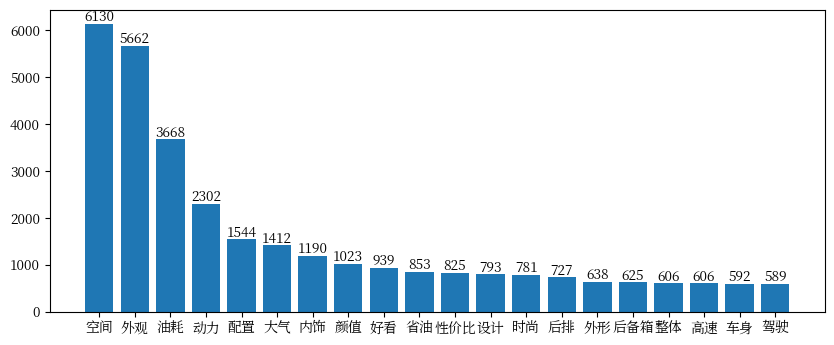

In [21]:
plot_freqency(icev_sat_20)

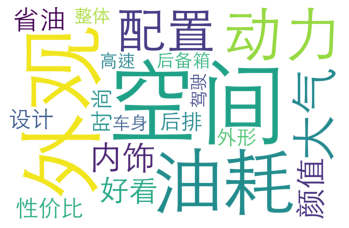

In [22]:
wc_from_word_count(icev_sat_20)

## Unsatisfied for NEVs

In [23]:
nev_unsat_20 = get_20_most_common_and_frequencies(cat_nev_unsat, stop_word)

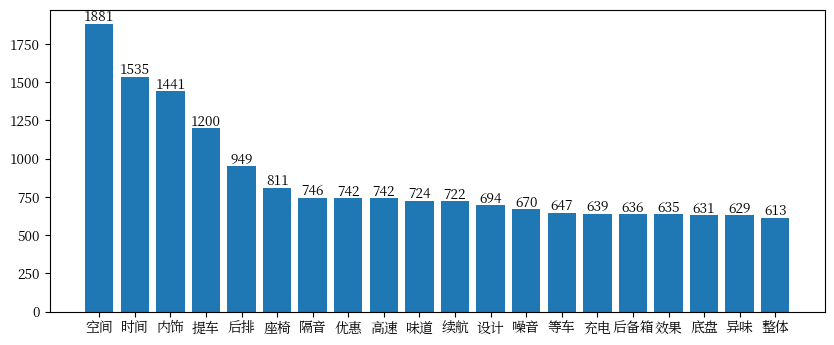

In [24]:
plot_freqency(nev_unsat_20)

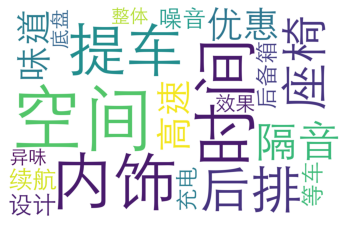

In [25]:
wc_from_word_count(nev_unsat_20)

## Unsatisfied for ICEVs

In [26]:
icev_unsat_20 = get_20_most_common_and_frequencies(cat_icev_unsat, stop_word)

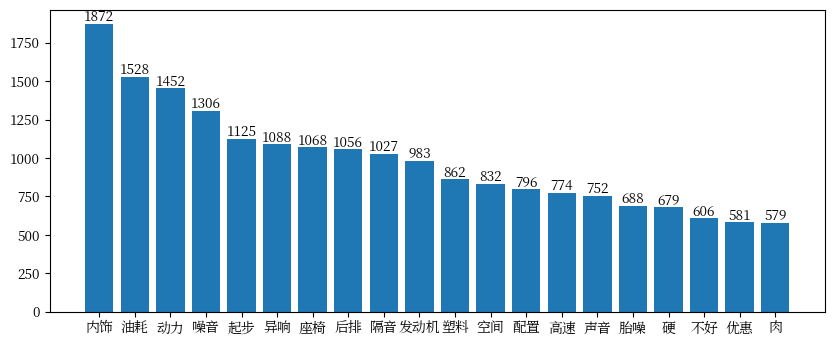

In [27]:
plot_freqency(icev_unsat_20)

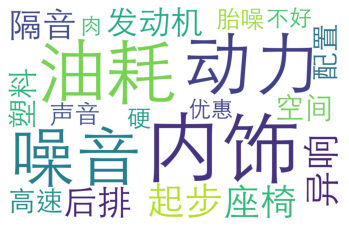

In [28]:
wc_from_word_count(icev_unsat_20)

In [29]:
nev_review.head()

,Title,User,Time,Model,Satisfied,Unsatisfied
11964,居家唐新能源，享受便利,把一切重来,2022-07-28 发表口碑,唐新能源,我最满意的是唐新能源的整体设计，我觉得很不错，很实用，最重要的是纯电续航也很好，动力也够用。,我对操控不太满意，因为我以前开的是小型家用车，不习惯换这个混动车。
14385,送货家用两合适，我的大唐DM-i生意上有个伴,重庆车友5207583,2022-01-09 发表口碑,唐新能源,有空调，夏天的时候给别人送货还是比较舒服的，不用忍受天气热的烦恼。而且这个车开空调的时候，油...,我认为还是车子的动力比较弱吧，有时候车子带人或者拖货的时候上坡都有些吃力。这个车在城区开空调...
13913,元plus真的太满足我了,开车去度假618,2022-04-26 发表口碑,元PLUS,动力是真的很足，新能源汽车的推背感是真的爽。,运动内饰，仁者见仁智者见智吧，我可能还没有完全习惯。
12963,聊聊爱车的具体表现，操控感受是最棒的,goeduke,2022-02-22 发表口碑,AION Y,操控很棒，从买车到用车，这是让我感受最深的地方。尤其是这些智能的配置，360度全景影像让我在...,充一次电续航里程能够达到550公里，从这方面来看，还是不错的，但是我个人认为，百公里的耗电有...
9987,秦PLUS颜值那么高！,傲视苍穹小v,2021-08-25 发表口碑,秦PLUS,最满意的当然是秦PLUS的颜值了，从哪个角度看都是那么帅气，家族式龙脸设计还是很瞩目的，还有...,最不满意的还车内的异味，一股新车的皮质气味，看了下生产日期，确实是近期的车，只能理解一下了，...


# Sentiment Analysis

In [30]:
for i in range(10):
    text = nev_review.iloc[i,5]
    s = SnowNLP(text)
    print(s.sentiments)

0.12010553254923717
0.0031151845130765743
0.05065773510787386
0.920198242355969
0.0011519232485646125
0.8935878777983521
0.1985986946171867
0.9124813521838055
0.03356248870743839
3.391075022529666e-05


In [31]:
nev_review['Satisfied_Sentiment'] = nev_review['Satisfied'].apply(lambda x: SnowNLP(x).sentiments)

In [32]:
nev_review['Unsatisfied_Sentiment'] = nev_review['Unsatisfied'].apply(lambda x: SnowNLP(x).sentiments)

In [33]:
icev_review['Satisfied_Sentiment'] = icev_review['Satisfied'].apply(lambda x: SnowNLP(x).sentiments)

In [34]:
icev_review['Unsatisfied_Sentiment'] = icev_review['Unsatisfied'].apply(lambda x: SnowNLP(x).sentiments)

In [52]:
print(nev_review['Satisfied_Sentiment'].mean())
print(nev_review['Satisfied_Sentiment'].std())

print(nev_review['Unsatisfied_Sentiment'].mean())
print(nev_review['Unsatisfied_Sentiment'].std())

print(icev_review['Satisfied_Sentiment'].mean())
print(icev_review['Satisfied_Sentiment'].std())

print(icev_review['Unsatisfied_Sentiment'].mean())
print(icev_review['Unsatisfied_Sentiment'].std())

0.8034222710503037
0.31624738363558563
0.40041932073654035
0.3746043008524422
0.8204234545678178
0.28615982189530026
0.3404443889013941
0.35595731474915016


In [36]:
res = ttest_ind(nev_review['Unsatisfied_Sentiment'], icev_review['Unsatisfied_Sentiment'])
print(res)

Ttest_indResult(statistic=14.214517363120967, pvalue=1.0483252187416726e-45)


In [37]:
nev_review.Model.value_counts()

唐新能源        3909
汉           3909
秦PLUS       3899
海豚           896
宋PLUS新能源     801
元PLUS        572
AION Y       393
理想ONE        246
Model 3      215
Model Y      160
Name: Model, dtype: int64

In [38]:
icev_review.Model.value_counts()

哈弗H6           2770
朗逸             2735
本田CR-V         2557
凯美瑞            1753
宝来             1634
长安CS75 PLUS    1190
轩逸              820
雅阁              784
雷凌              717
卡罗拉              40
Name: Model, dtype: int64